In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading BokehJS ...

In [2]:
%matplotlib inline
# Inline matplotlib (keep charts in this nb)
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel("SALESDATA.xlsx")
df.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,@dropdown,Unnamed: 21
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,237.91,0.00,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,456.17,824.96,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,438.93,548.66,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,...,211.75,0.00,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons


In [7]:
df.shape

(65282, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

In [9]:
df.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M', '@dropdown', 'Unnamed: 21'],
      dtype='object')

In [10]:
df.dtypes

CustKey                                      int64
DateKey                             datetime64[ns]
Discount Amount                            float64
Invoice Date                        datetime64[ns]
Invoice Number                               int64
Item Class                                  object
Item Number                                 object
Item                                        object
Line Number                                  int64
List Price                                 float64
Order Number                                 int64
Promised Delivery Date              datetime64[ns]
Sales Amount                               float64
Sales Amount Based on List Price           float64
Sales Cost Amount                          float64
Sales Margin Amount                        float64
Sales Price                                float64
Sales Quantity                               int64
Sales Rep                                    int64
U/M                            

In [11]:
df.dtypes

CustKey                                      int64
DateKey                             datetime64[ns]
Discount Amount                            float64
Invoice Date                        datetime64[ns]
Invoice Number                               int64
Item Class                                  object
Item Number                                 object
Item                                        object
Line Number                                  int64
List Price                                 float64
Order Number                                 int64
Promised Delivery Date              datetime64[ns]
Sales Amount                               float64
Sales Amount Based on List Price           float64
Sales Cost Amount                          float64
Sales Margin Amount                        float64
Sales Price                                float64
Sales Quantity                               int64
Sales Rep                                    int64
U/M                            

In [35]:
#changing the columns
df.rename(columns ={'discount Amount':'discount_amount', 'invoice data':'invoice_data', 'invoice number': 'invoice_number', 'item class':'item_class', 'item number':'item_number'})
df.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,@dropdown,Unnamed: 21
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,237.91,0.00,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,456.17,824.96,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,438.93,548.66,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,...,211.75,0.00,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons


In [36]:
df.duplicated().sum()
#checking for the duplicated

0

In [22]:
#removing duplicated
df=df.drop_duplicates()


In [25]:
df.duplicated().sum()


0

In [87]:
#checking the null values
df.isnull().sum()

CustKey                                 0
DateKey                                 0
Discount Amount                         2
Invoice Date                            0
Invoice Number                          0
Item Class                           8289
Item Number                            41
Item                                    0
Line Number                             0
List Price                              0
Order Number                            0
Promised Delivery Date                  0
Sales Amount                            0
Sales Amount Based on List Price        0
Sales Cost Amount                       0
Sales Margin Amount                     0
Sales Price                             1
Sales Quantity                          0
Sales Rep                               0
U/M                                     0
@dropdown                           65282
Unnamed: 21                         65278
dtype: int64

In [89]:
df.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,@dropdown,Unnamed: 21
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,5.476087,0.00,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,6.125055,824.96,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,6.086616,548.66,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,...,5.360118,0.00,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,11.399193,185876.60,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons


In [54]:
df['discount Amount'].fillna(df['discount Amount'].mean(),inplace=True)
df['Item Class '].fillna(df['Item Class '].mean(),inplace=True)
df['Item Number '].fillna(df['Item Number  '].median(),inplace=True)
df[' Sales Price '].fillna(df[' Sales Price  '].mean(),inplace=True)
df['Unnamed: 21  '].fillna(df[' Unnamed: 21  '].mean(),inplace=True)
df[' @dropdown '].fillna(df[' @dropdown  '].median(),inplace=True)
df.isnull().sum()


KeyError: 'discount Amount'

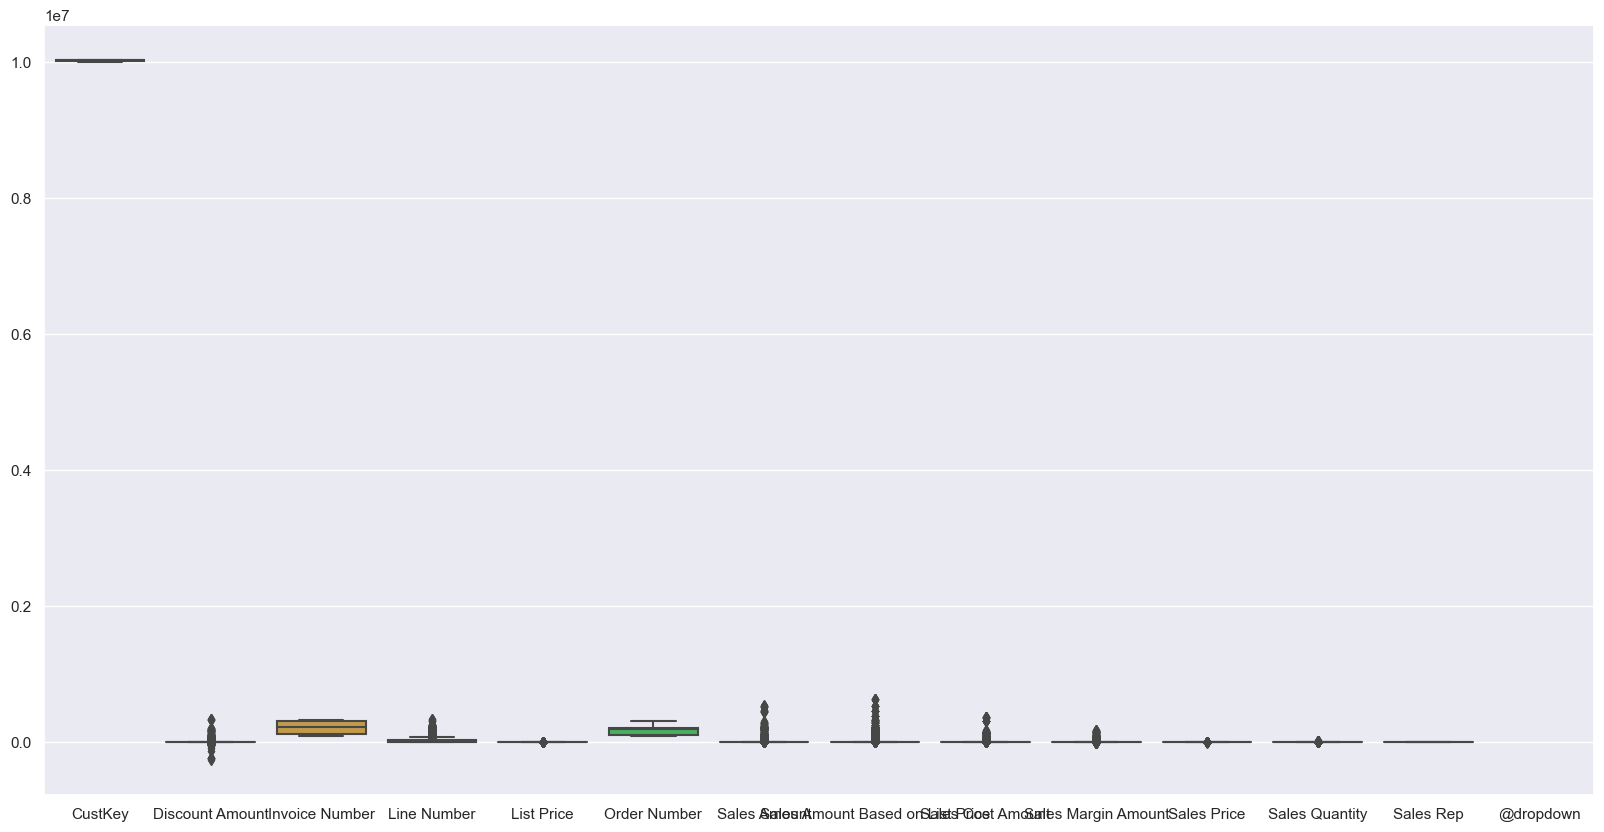

In [56]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data=df)
plt.show()

In [86]:
df.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,@dropdown
count,6.528200e+04,65280.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65281.000000,65282.000000,65282.000000,0.0
mean,1.001770e+07,1855.574835,216223.662020,23713.849790,514.693380,180583.064352,6.628060,4707.473613,1660.979228,1191.059145,283.615913,45.084311,137.422398,NaN
std,7.176148e+03,9037.140888,94992.281866,32664.024053,449.189182,67593.871116,1.191327,20696.443785,9556.485250,5860.787502,252.876719,429.661793,26.643936,NaN
min,1.000045e+07,-255820.800000,100012.000000,1000.000000,0.000000,100838.000000,5.303355,0.000000,0.000000,-3932.930000,-5000.000000,-1.000000,103.000000,NaN
25%,1.001272e+07,246.037500,117931.000000,3000.000000,181.560000,115321.000000,5.734595,561.040000,167.790000,129.950000,100.070000,2.000000,113.000000,NaN
50%,1.001966e+07,441.760000,222869.500000,12000.000000,325.190000,203702.000000,6.318860,998.160000,304.500000,246.490000,183.757500,3.000000,134.000000,NaN
75%,1.002351e+07,999.760000,314318.750000,32000.000000,803.860000,218576.000000,7.155429,2315.040000,687.320000,579.530000,448.220000,8.000000,160.000000,NaN
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,13.227402,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000,NaN


In [82]:
print("min sales quality unit is",df.Sales quality.min())
print("max sales quality unit is",df.Sales quality.max())
print(df.Sales quality.value_count())

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3257106865.py, line 1)

In [93]:
df.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,@dropdown,Unnamed: 21
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,5.476087,0.00,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,6.125055,824.96,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,6.086616,548.66,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,...,5.360118,0.00,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,11.399193,185876.60,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons


C:\Users\abhis\AppData\Local\Temp\ipykernel_780\3577361743.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Discount Amount'])


<Axes: xlabel='Discount Amount', ylabel='Density'>

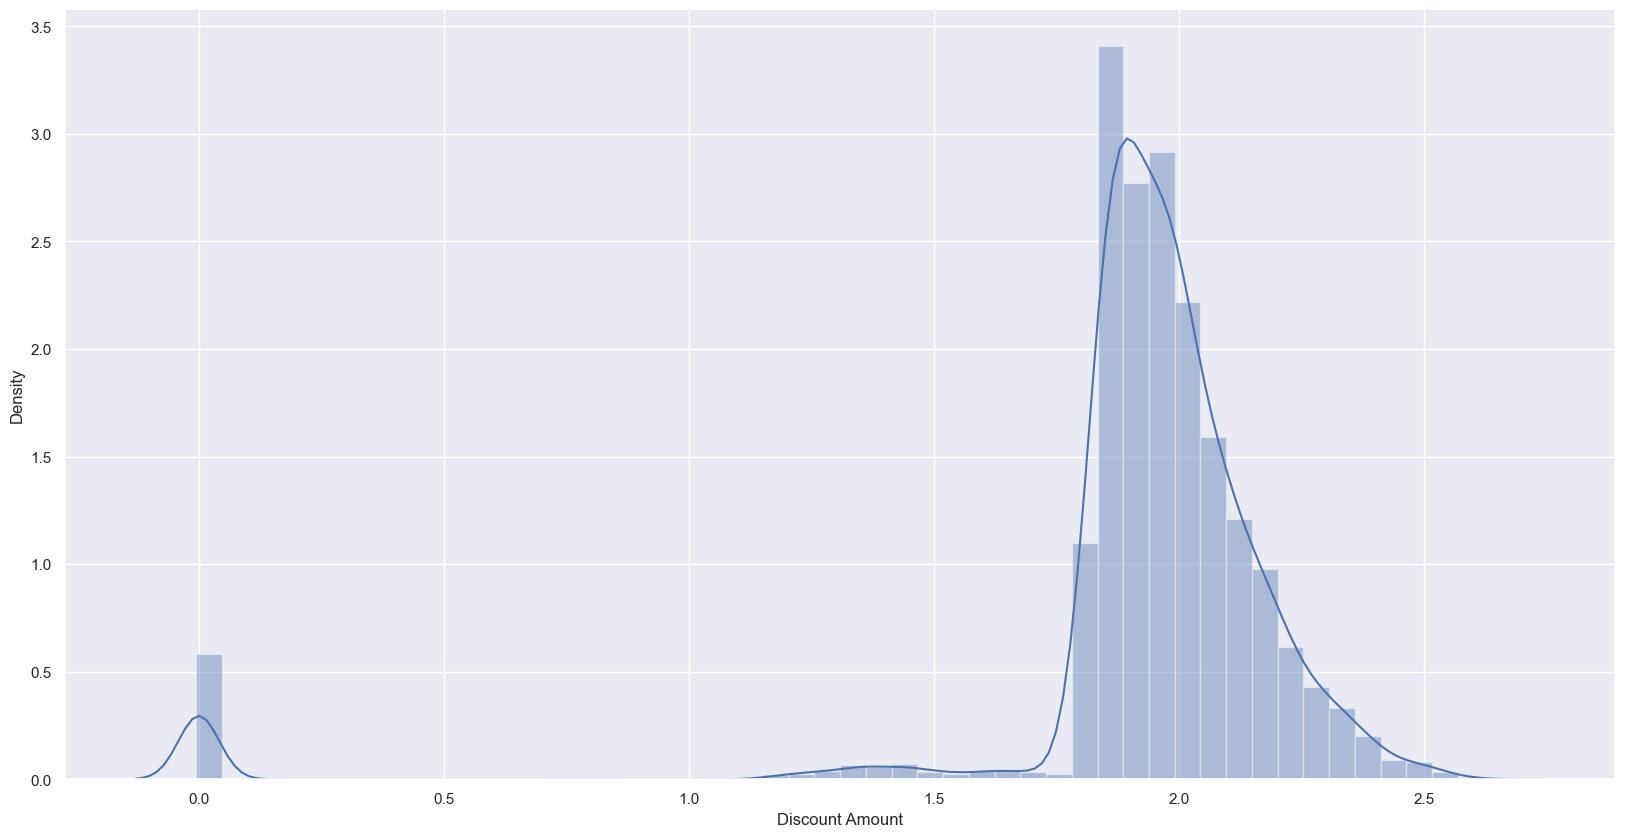

In [96]:
df['Invoice Date'] = np.log(1 + df['Discount Amount'])
sns.distplot(df['Discount Amount'])

<Axes: xlabel='Item Class', ylabel='Line Number'>

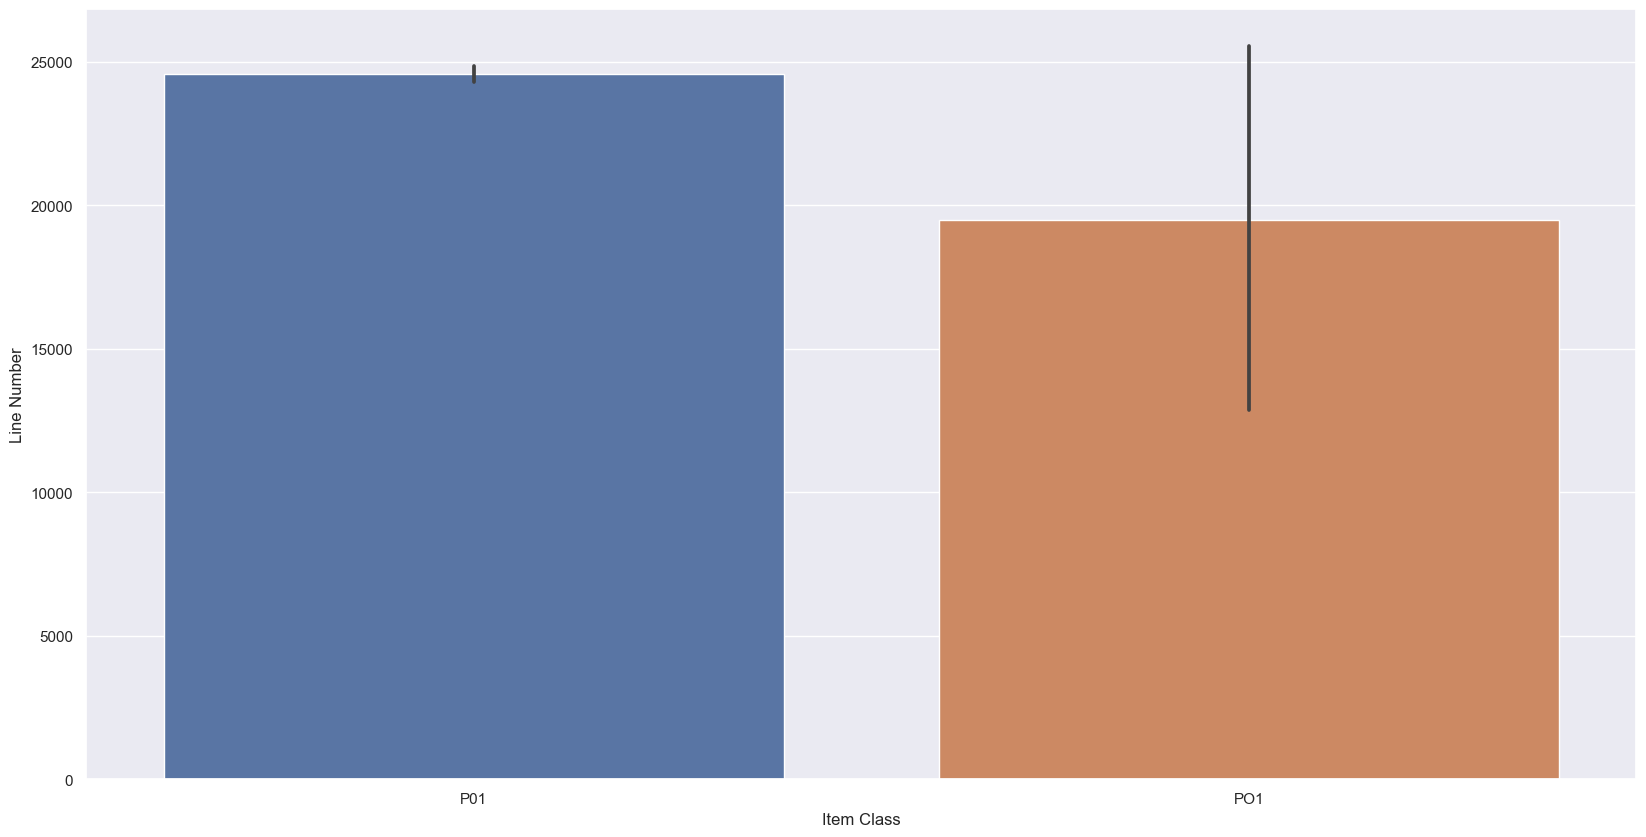

In [99]:
sns.barplot(x = df['Item Class'], y=df['Line Number'])

<Axes: xlabel='List Price', ylabel='List Price'>

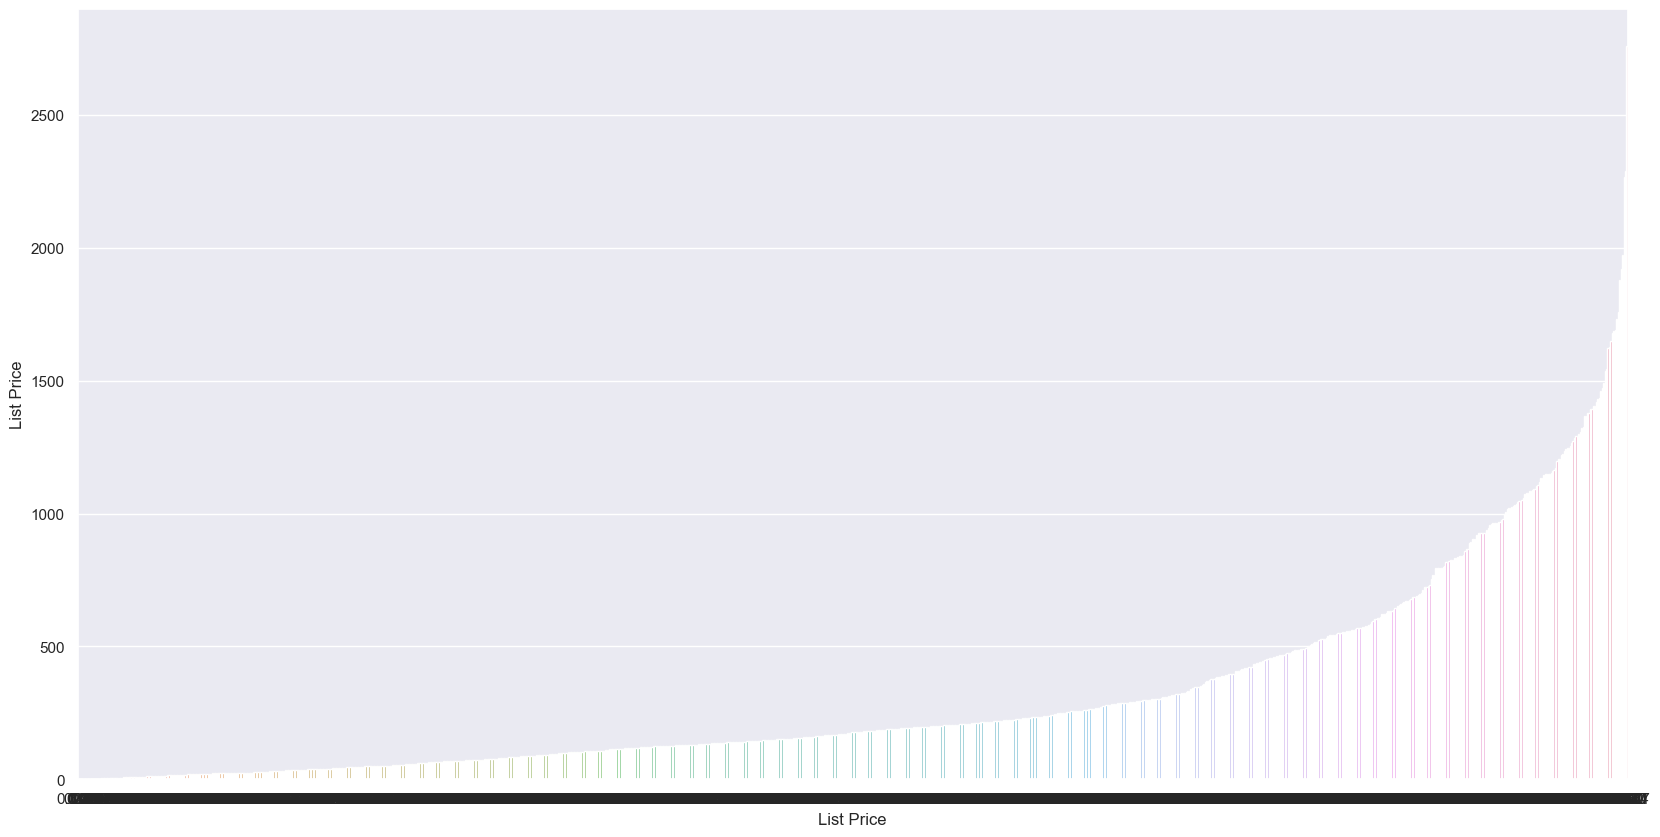

In [100]:
sns.barplot(x = df['List Price'], y=df['List Price'])

C:\Users\abhis\AppData\Local\Temp\ipykernel_780\2107724918.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


,CustKey,Discount Amount,Invoice Date,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,@dropdown
CustKey,1.000000,-0.045271,-0.048109,-0.077041,0.033806,-0.007856,0.054727,0.015797,0.004445,0.019041,0.018226,-0.007599,0.031855,-0.160200,NaN
Discount Amount,-0.045271,1.000000,0.987147,0.156148,0.074508,0.284227,-0.055023,0.249481,0.105542,0.002173,0.028978,0.204268,-0.126292,-0.057211,NaN
Invoice Date,-0.048109,0.987147,1.000000,0.171286,0.083900,0.234190,-0.063389,0.116108,0.035904,-0.049383,-0.031579,0.158383,-0.150554,-0.054935,NaN
Invoice Number,-0.077041,0.156148,0.171286,1.000000,0.003674,0.011378,-0.667287,-0.002450,0.003738,0.002687,-0.007483,-0.019082,0.000778,0.002515,NaN
Line Number,0.033806,0.074508,0.083900,0.003674,1.000000,-0.076321,0.001024,-0.109282,-0.069205,-0.064683,-0.069932,-0.099068,-0.058732,-0.049204,NaN
List Price,-0.007856,0.284227,0.234190,0.011378,-0.076321,1.000000,-0.007262,0.320266,0.025665,-0.014207,-0.002157,0.950609,-0.095842,0.002841,NaN
Order Number,0.054727,-0.055023,-0.063389,-0.667287,0.001024,-0.007262,1.000000,0.006048,0.000028,-0.000846,0.012164,0.020454,-0.000153,0.005412,NaN
Sales Amount,0.015797,0.249481,0.116108,-0.002450,-0.109282,0.320266,0.006048,1.000000,0.570423,0.483940,0.536016,0.307138,0.309934,0.011981,NaN
Sales Amount Based on List Price,0.004445,0.105542,0.035904,0.003738,-0.069205,0.025665,0.000028,0.570423,1.000000,0.896738,0.914729,0.012639,0.638784,0.029246,NaN
Sales Cost Amount,0.019041,0.002173,-0.049383,0.002687,-0.064683,-0.014207,-0.000846,0.483940,0.896738,1.000000,0.930948,-0.016406,0.859719,0.036524,NaN


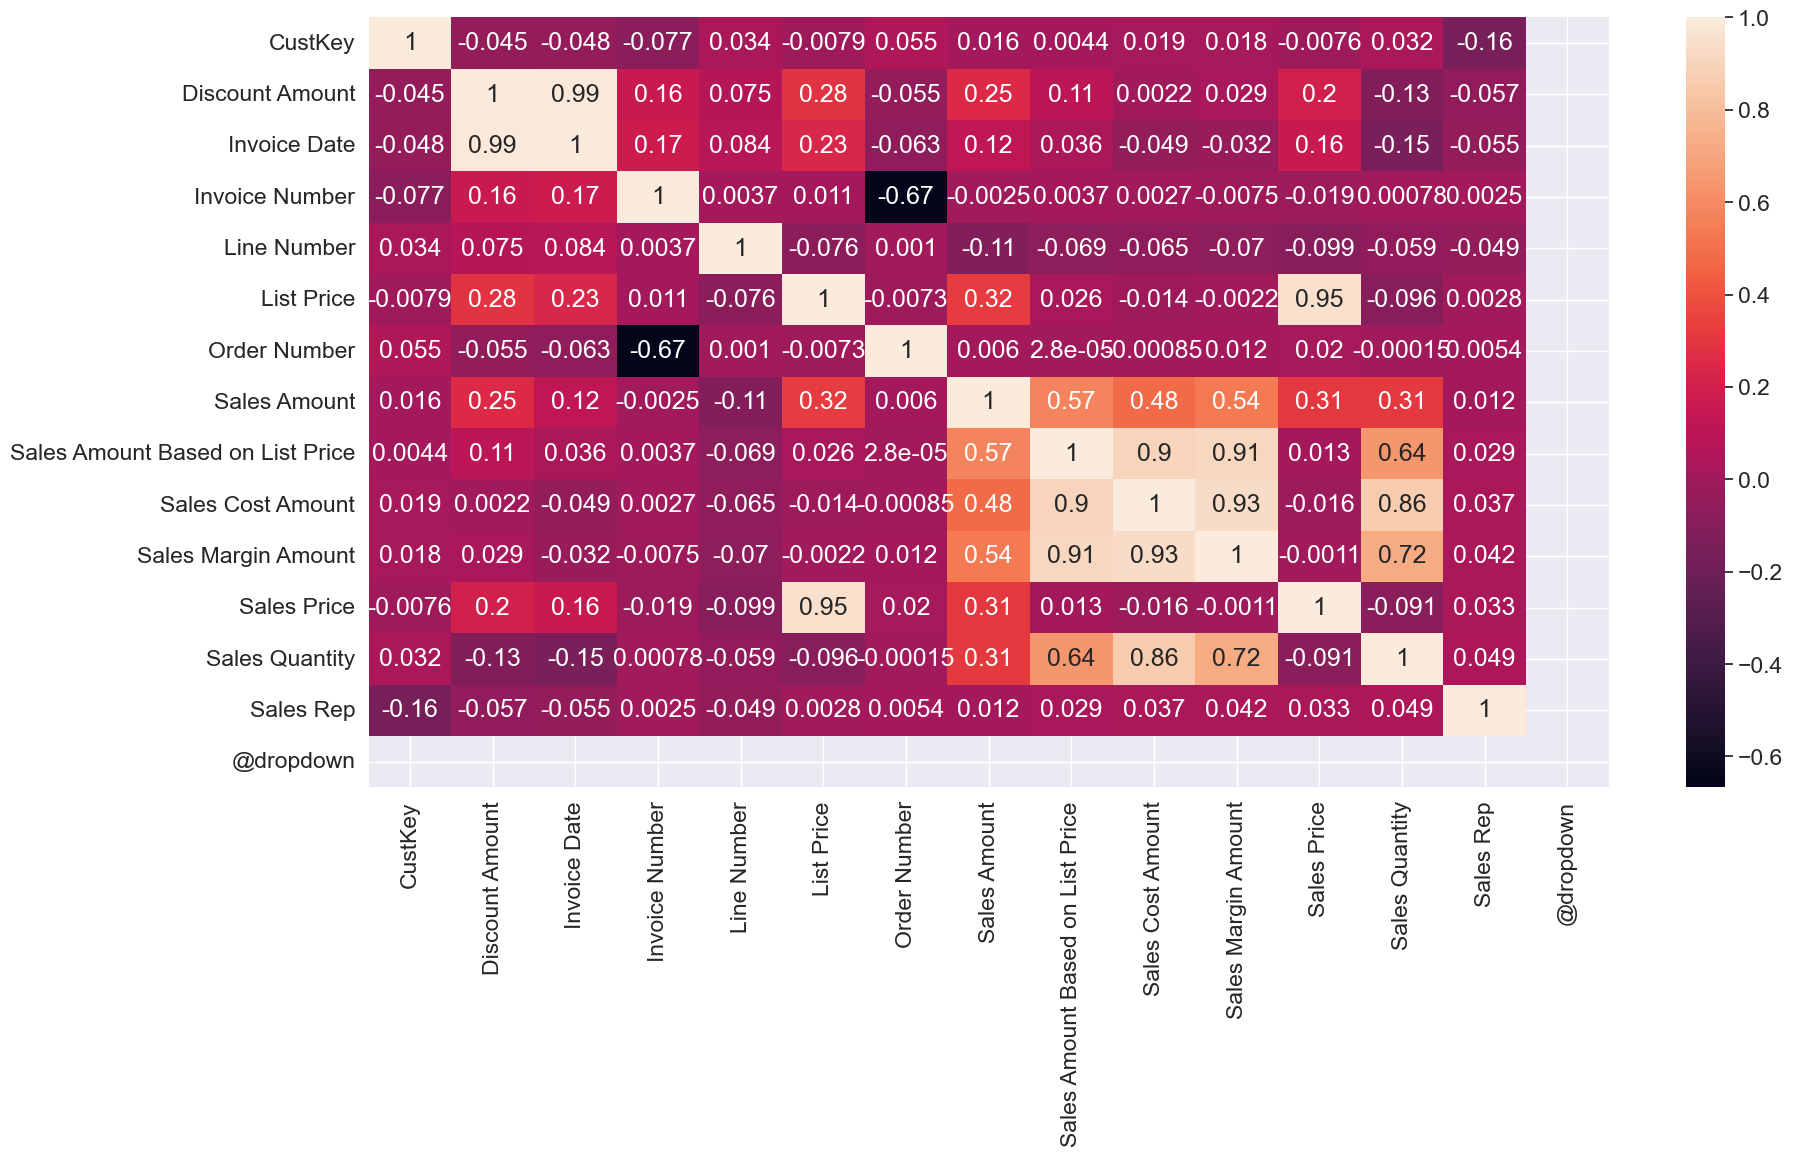

In [101]:
#finding relationship between features
corr= df.corr()
sns.set(font_scale = 1.5)
plt.figure(figsize=(20,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
corr

In [106]:
#model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [109]:
df.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,@dropdown,Unnamed: 21
0,10000481,2017-04-30,NaN,NaN,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,5.476087,0.00,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,1.933394,1.076160,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,6.125055,824.96,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,1.741710,1.008582,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,6.086616,548.66,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,NaN,NaN,100096,NaN,NaN,Kiwi Lox,1000,0.00,...,5.360118,0.00,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,2.524018,1.259602,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,11.399193,185876.60,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons


In [110]:
X = df.drop(['Sales Quantity','Sales Price'], axis=1)
y = df['Sales Quantity'].apply(lambda y_value: 1 if y_value>= 1 else 0)
print(X.head())
print(X.shape)

    CustKey    DateKey  Discount Amount  Invoice Date  Invoice Number  \
0  10000481 2017-04-30              NaN           NaN          100012   
1  10002220 2017-07-14         1.933394      1.076160          100233   
2  10002220 2017-10-17         1.741710      1.008582          116165   
3  10002489 2017-06-03              NaN           NaN          100096   
4  10004516 2017-05-27         2.524018      1.259602          103341   

  Item Class Item Number                             Item  Line Number  \
0        NaN         NaN                 Urban Large Eggs         2000   
1        P01       20910               Moms Sliced Turkey         1000   
2        P01       38076  Cutting Edge Foot-Long Hot Dogs         1000   
3        NaN         NaN                         Kiwi Lox         1000   
4        P01       60776             High Top Sweet Onion         1000   

   List Price  Order Number Promised Delivery Date  Sales Amount  \
0        0.00        200015             2017-04-

In [111]:
print(y.sample(5))


35715    1
6137     1
14946    1
51116    1
43257    1
Name: Sales Quantity, dtype: int64


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state =2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(52225, 20) (13057, 20) (52225,) (13057,)


In [ ]:
wine quality is bad